# Intro y requisitos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install windrose
from windrose import WindroseAxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd #para manejar las tablitas
import numpy as np
import matplotlib.pyplot as plt #para graficar
import seaborn as sns #para graficar
import glob as glb #para archivos

In [4]:
%cd /content/drive/MyDrive/Meteo_general

/content/drive/MyDrive/Meteo_general


# Rellenar variables

In [5]:
files = sorted(glb.glob("*csv"))
files # acuerdate este orden

['Huaytapallana_ago.csv',
 'Huaytapallana_feb.csv',
 'Malinowsky_agosto.csv',
 'Malinowsky_feb.csv',
 'Von_Humboldt_ago.csv',
 'Von_Humboldt_feb.csv']

In [6]:
archivos=[]
for file in files:
   df=pd.read_csv(file, skiprows=10)
   df=df.replace('S/D',np.NaN)
   #cambiando el tipo de columnas
   df["TEMPERATURA (°C)"]=df["TEMPERATURA (°C)"].astype(float)
   df["PRECIPITACIÓN (mm/hora)"]=df["PRECIPITACIÓN (mm/hora)"].astype(float)
   df["HUMEDAD (%)"]=df["HUMEDAD (%)"].astype(float)
   df["DIRECCION DEL VIENTO (°)"]=df["DIRECCION DEL VIENTO (°)"].astype(float)
   df["VELOCIDAD DEL VIENTO (m/s)"]=df["VELOCIDAD DEL VIENTO (m/s)"].astype(float)
   df["AÑO / MES / DÍA"] =pd.to_datetime(df["AÑO / MES / DÍA"], format="%Y/%m/%d")
   #elegiendo el dia
   df['dia'] = df["AÑO / MES / DÍA"].dt.day
   df1= df[df['dia']==9] #eligi el dia 9, pueden cambiarlo
   #variables nuevas
   df1["es"]= 6.11*(10**(7.5*df1["TEMPERATURA (°C)"]/(237.5+df1["TEMPERATURA (°C)"])))
   df1["ea"]= df1["HUMEDAD (%)"]*df1["es"]/100
   df1["Deficit"] = df1["es"]-df1["ea"]
   df1["Td"]= (237.5*np.log10(df1["ea"]/6.11) ) / (7.5 - np.log10(df1["ea"]/6.11))
   df1["Humedad_absoluta"] = 216.5 * df1["ea"] / (df1["TEMPERATURA (°C)"]+273.15)
   archivos.append(df1)

<ipython-input-6-9ed1656e8eaa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["es"]= 6.11*(10**(7.5*df1["TEMPERATURA (°C)"]/(237.5+df1["TEMPERATURA (°C)"])))
<ipython-input-6-9ed1656e8eaa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ea"]= df1["HUMEDAD (%)"]*df1["es"]/100
<ipython-input-6-9ed1656e8eaa>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [7]:
df_Huaytapallana_ago = archivos[0]
df_Huaytapallana_feb = archivos[1]
df_Malinowsky_ago = archivos[2]
df_Malinowsky_feb = archivos[3]
df_Von_Humboldt_ago = archivos[4]
df_Von_Humboldt_feb = archivos[5]

In [8]:
#Para Von Humboldt
altitud_Von_Humboldt = 247
presion_Von_Humboldt = 1014.8*np.exp(-1.17*10**-4*altitud_Von_Humboldt)
#Para Huaytapallana
altitud_Huaytapallana = 4648
presion_Huaytapallana = 1014.8*np.exp(-1.17*10**-4*altitud_Huaytapallana)
#Para Mallinoswky
altitud_Mallinoswky = 220
presion_Mallinoswky = 1014.8*np.exp(-1.17*10**-4*altitud_Mallinoswky)

In [9]:
#Para Von Humboldt
df_Von_Humboldt_feb["q"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-0.3786*df_Von_Humboldt_feb["ea"]))
df_Von_Humboldt_feb["r"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-df_Von_Humboldt_feb["ea"]))

df_Von_Humboldt_ago["q"]=622*(df_Von_Humboldt_ago["ea"]/(presion_Von_Humboldt-0.3786*df_Von_Humboldt_ago["ea"]))
df_Von_Humboldt_ago["r"]=622*(df_Von_Humboldt_ago["ea"]/(presion_Von_Humboldt-df_Von_Humboldt_ago["ea"]))

#Para Huaytapallana
df_Huaytapallana_feb["q"]=622*(df_Huaytapallana_feb["ea"]/(presion_Huaytapallana-0.3786*df_Huaytapallana_feb["ea"]))
df_Huaytapallana_feb["r"]=622*(df_Huaytapallana_feb["ea"]/(presion_Huaytapallana-df_Huaytapallana_feb["ea"]))

df_Huaytapallana_ago["q"]=622*(df_Huaytapallana_ago["ea"]/(presion_Huaytapallana-0.3786*df_Huaytapallana_ago["ea"]))
df_Huaytapallana_ago["r"]=622*(df_Huaytapallana_ago["ea"]/(presion_Huaytapallana-df_Huaytapallana_ago["ea"]))

#Para Mallinowsky
df_Malinowsky_feb["q"]=622*(df_Malinowsky_feb["ea"]/(presion_Mallinoswky-0.3786*df_Malinowsky_feb["ea"]))
df_Malinowsky_feb["r"]=622*(df_Malinowsky_feb["ea"]/(presion_Mallinoswky-df_Malinowsky_feb["ea"]))

df_Malinowsky_ago["q"]=622*(df_Malinowsky_ago["ea"]/(presion_Mallinoswky-0.3786*df_Malinowsky_ago["ea"]))
df_Malinowsky_ago["r"]=622*(df_Malinowsky_ago["ea"]/(presion_Mallinoswky-df_Malinowsky_ago["ea"]))

<ipython-input-9-7d62ea9148d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Von_Humboldt_feb["q"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-0.3786*df_Von_Humboldt_feb["ea"]))
<ipython-input-9-7d62ea9148d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Von_Humboldt_feb["r"]=622*(df_Von_Humboldt_feb["ea"]/(presion_Von_Humboldt-df_Von_Humboldt_feb["ea"]))


# Momento de graficar

## Estacion Von Humboldt

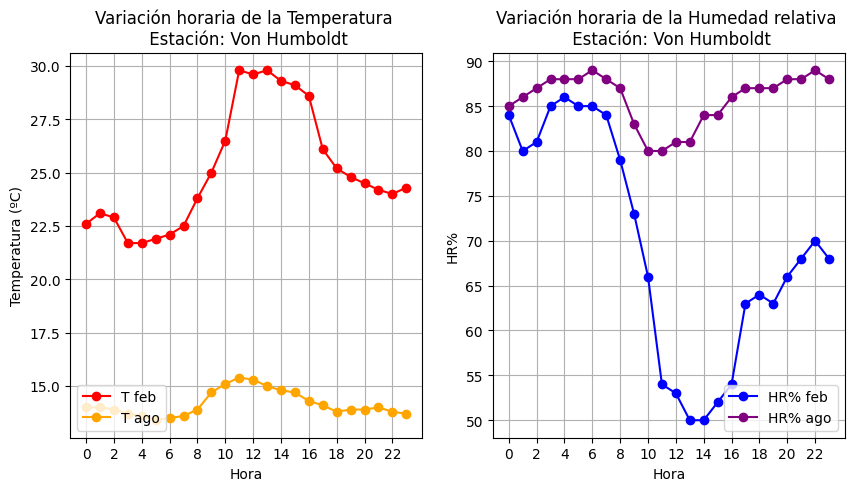

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para temperaturas
ax1.plot(x,df_Von_Humboldt_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax1.plot(x,df_Von_Humboldt_ago["TEMPERATURA (°C)"],color="orange", marker="o",label="T ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Temperatura (ºC)")
ax1.set_title("Variación horaria de la Temperatura \n Estación: Von Humboldt")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend(loc="lower left")

#humedad relativa
ax2=axs[1]
ax2.plot(x, df_Von_Humboldt_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb ")
ax2.plot(x, df_Von_Humboldt_ago["HUMEDAD (%)"],color="purple",marker="o",label="HR% ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("HR%")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend(loc="lower right")
ax2.set_title("Variación horaria de la Humedad relativa \n Estación: Von Humboldt")
ax2.grid()
plt.show()

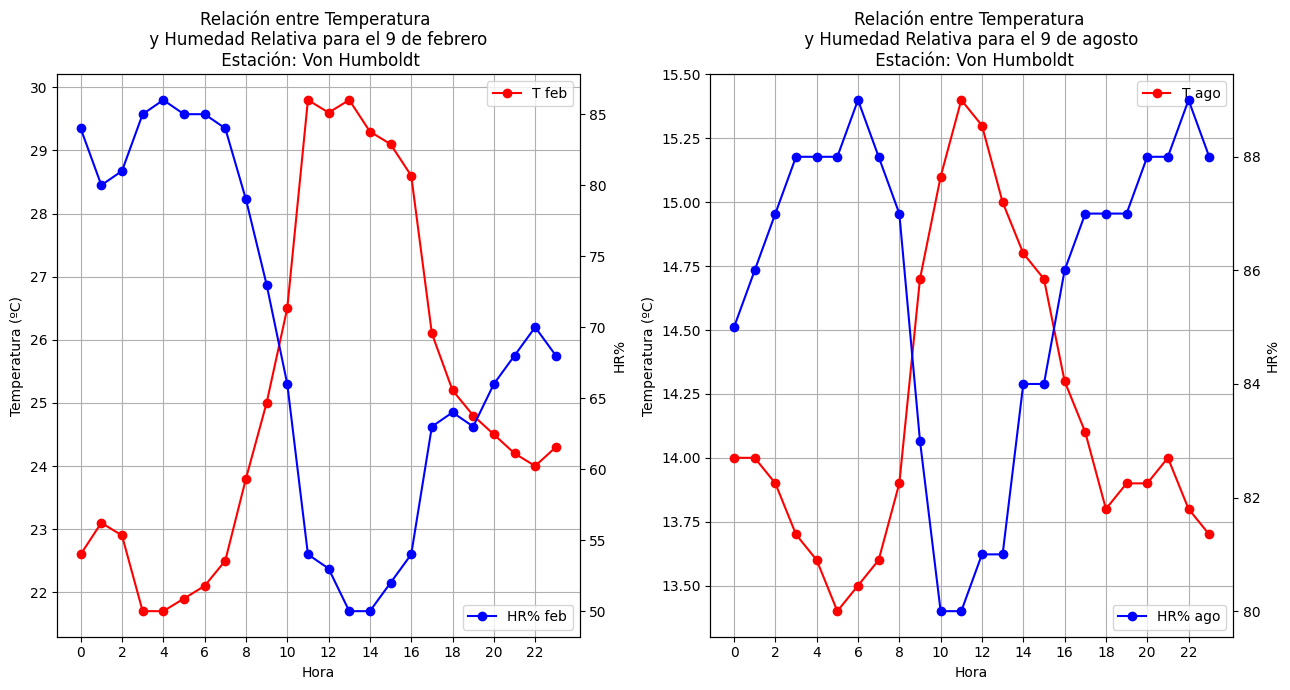

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
x = np.arange(0,24,1)

#FEBRERO
ax=axs[0]
ax.plot(x,df_Von_Humboldt_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax.set_xlabel("Hora")
ax.set_ylabel("Temperatura (ºC)")
ax.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de febrero \n Estación: Von Humboldt")
ax.legend(loc="upper right")
ax.grid()
#humedad relativa
ax1=ax.twinx()
ax1.plot(x, df_Von_Humboldt_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb")
ax1.set_ylabel("HR%")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.legend(loc="lower right")

#AGOSTO
ax2=axs[1]
ax2.plot(x,df_Von_Humboldt_ago["TEMPERATURA (°C)"],color="red", marker="o",label="T ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Temperatura (ºC)")
ax2.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de agosto \n Estación: Von Humboldt")
ax2.legend(loc="upper right")
ax2.grid()

ax3=ax2.twinx()
ax3.plot(x, df_Von_Humboldt_ago["HUMEDAD (%)"],color="blue",marker="o",label="HR% ago")
ax3.set_ylabel("HR%")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend(loc="lower right")

plt.tight_layout()

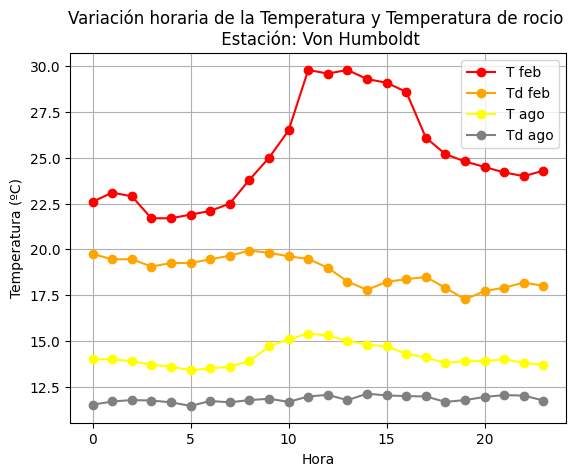

In [12]:
x = np.arange(0,24,1)
plt.plot(x,df_Von_Humboldt_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
plt.plot(x,df_Von_Humboldt_feb["Td"],color="orange", marker="o",label="Td feb")
plt.plot(x,df_Von_Humboldt_ago["TEMPERATURA (°C)"],color="yellow", marker="o",label="T ago")
plt.plot(x,df_Von_Humboldt_ago["Td"],color="gray", marker="o",label="Td ago")
plt.title("Variación horaria de la Temperatura y Temperatura de rocio \n Estación: Von Humboldt")
plt.legend()
plt.xlabel("Hora")
plt.ylabel("Temperatura (ºC)")
plt.grid()
plt.show()

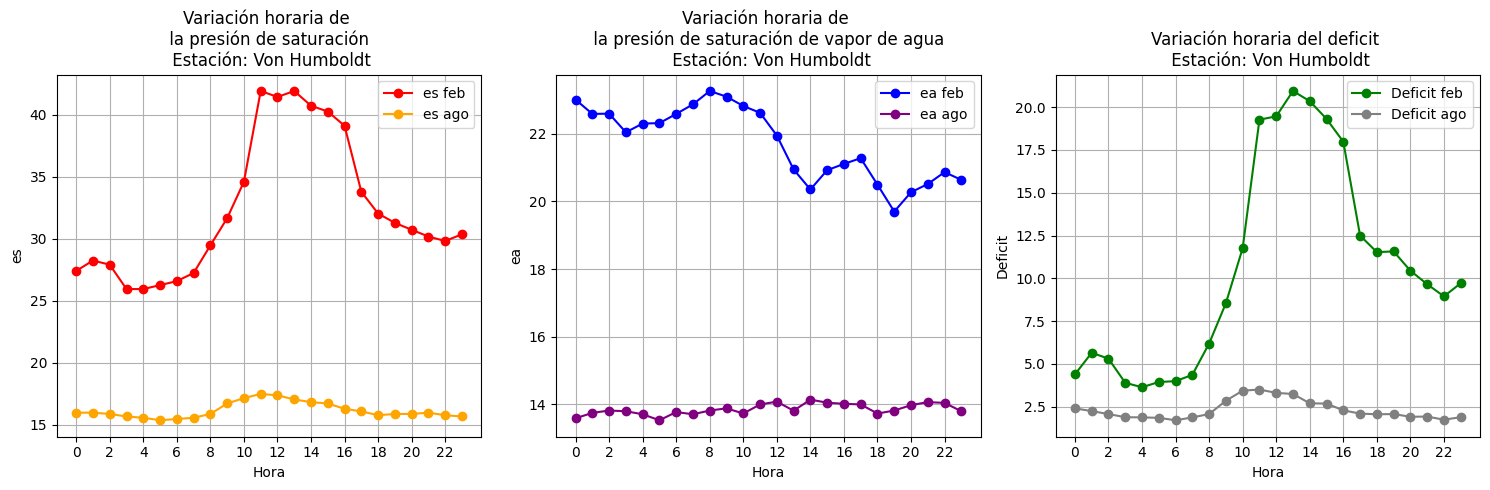

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Von_Humboldt_feb["es"],color="red", marker="o",label="es feb")
ax1.plot(x,df_Von_Humboldt_ago["es"],color="orange", marker="o",label="es ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("es")
ax1.set_title("Variación horaria de \n la presión de saturación \n Estación: Von Humboldt")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Von_Humboldt_feb["ea"],color="blue",marker="o",label="ea feb ")
ax2.plot(x, df_Von_Humboldt_ago["ea"],color="purple",marker="o",label="ea ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("ea")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la presión de saturación de vapor de agua \n Estación: Von Humboldt")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Von_Humboldt_feb["Deficit"],color="green",marker="o",label="Deficit feb ")
ax3.plot(x, df_Von_Humboldt_ago["Deficit"],color="gray",marker="o",label="Deficit ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Deficit")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria del deficit \n Estación: Von Humboldt")
ax3.grid()

plt.tight_layout()

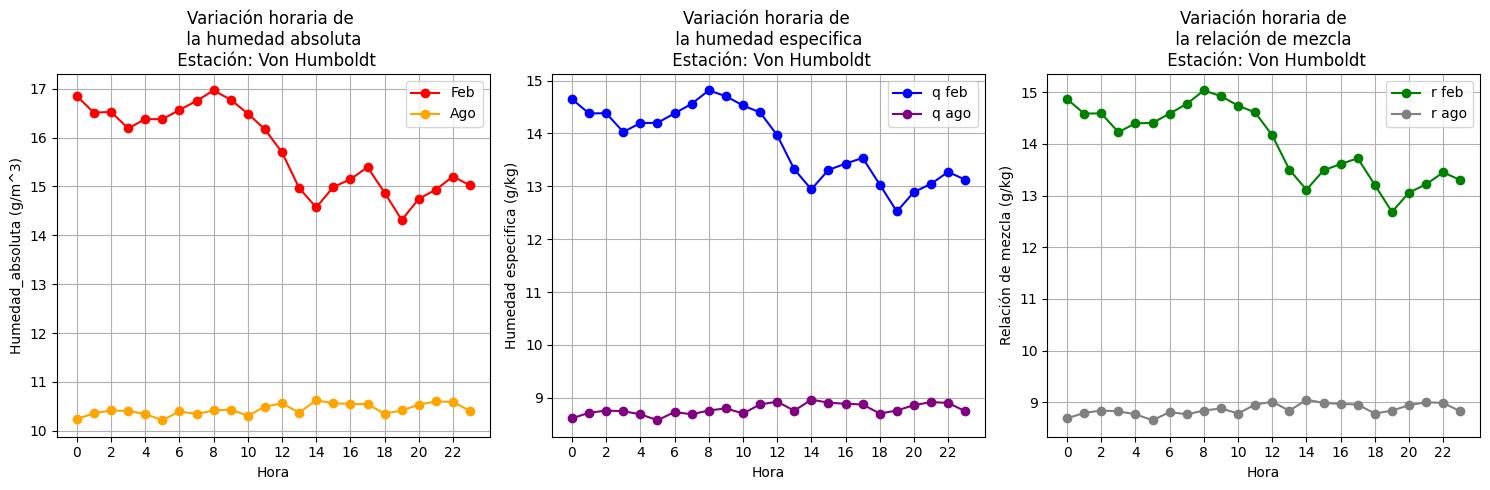

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Von_Humboldt_feb["Humedad_absoluta"],color="red", marker="o",label="Feb")
ax1.plot(x,df_Von_Humboldt_ago["Humedad_absoluta"],color="orange", marker="o",label="Ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Humedad_absoluta (g/m^3)")
ax1.set_title("Variación horaria de \n la humedad absoluta \n Estación: Von Humboldt")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Von_Humboldt_feb["q"],color="blue",marker="o",label="q feb ")
ax2.plot(x, df_Von_Humboldt_ago["q"],color="purple",marker="o",label="q ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Humedad especifica (g/kg)")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la humedad especifica \n Estación: Von Humboldt")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Von_Humboldt_feb["r"],color="green",marker="o",label="r feb ")
ax3.plot(x, df_Von_Humboldt_ago["r"],color="gray",marker="o",label="r ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Relación de mezcla (g/kg)")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria de\n la relación de mezcla \n Estación: Von Humboldt")
ax3.grid()

plt.tight_layout()

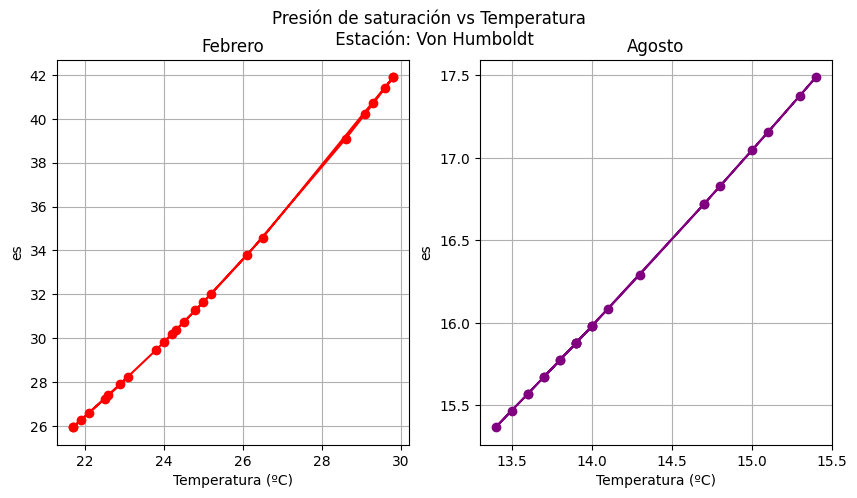

<Figure size 640x480 with 0 Axes>

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para febrero
ax1.plot(df_Von_Humboldt_feb["TEMPERATURA (°C)"],df_Von_Humboldt_feb["es"],color="red", marker="o")
ax1.set_xlabel("Temperatura (ºC)")
ax1.set_ylabel("es")
ax1.grid()
ax1.set_title("Febrero")

#Agosto
ax2=axs[1]
ax2.plot(df_Von_Humboldt_ago["TEMPERATURA (°C)"],df_Von_Humboldt_ago["es"],color="purple",marker="o")
ax2.set_xlabel("Temperatura (ºC)")
ax2.set_ylabel("es")
ax2.set_title("Agosto")
ax2.grid()
plt.suptitle("Presión de saturación vs Temperatura \n Estación: Von Humboldt")
plt.show()
plt.tight_layout()

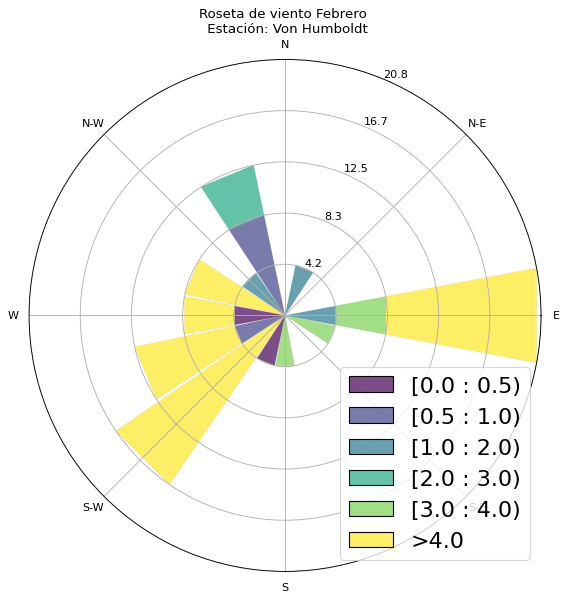

In [16]:
wd_Von_Humboldt_feb = df_Von_Humboldt_feb['DIRECCION DEL VIENTO (°)']
ws_Von_Humboldt_feb= df_Von_Humboldt_feb['VELOCIDAD DEL VIENTO (m/s)']

ax = WindroseAxes.from_ax()
ax.bar(wd_Von_Humboldt_feb, ws_Von_Humboldt_feb, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Febrero \n Estación: Von Humboldt")
plt.legend(fontsize=20, loc='lower right')

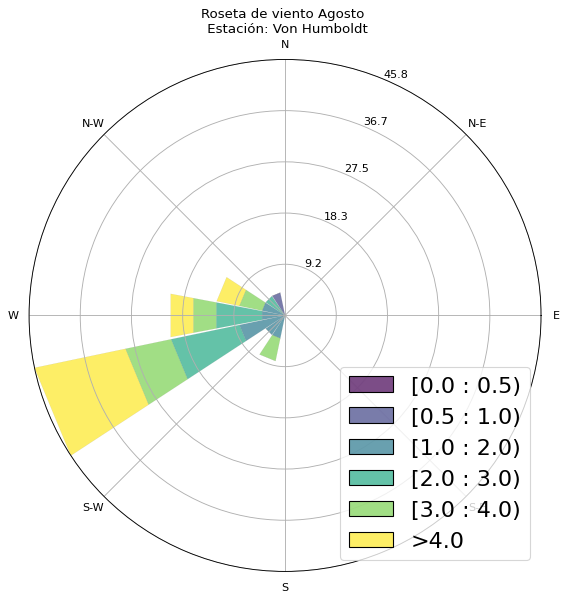

In [17]:
wd_Von_Humboldt_ago = df_Von_Humboldt_ago['DIRECCION DEL VIENTO (°)']
ws_Von_Humboldt_ago= df_Von_Humboldt_ago['VELOCIDAD DEL VIENTO (m/s)']


ax = WindroseAxes.from_ax()
ax.bar(wd_Von_Humboldt_ago, ws_Von_Humboldt_ago, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Agosto \n Estación: Von Humboldt")
plt.legend(fontsize=20, loc='lower right')

## Para Huaytapallana

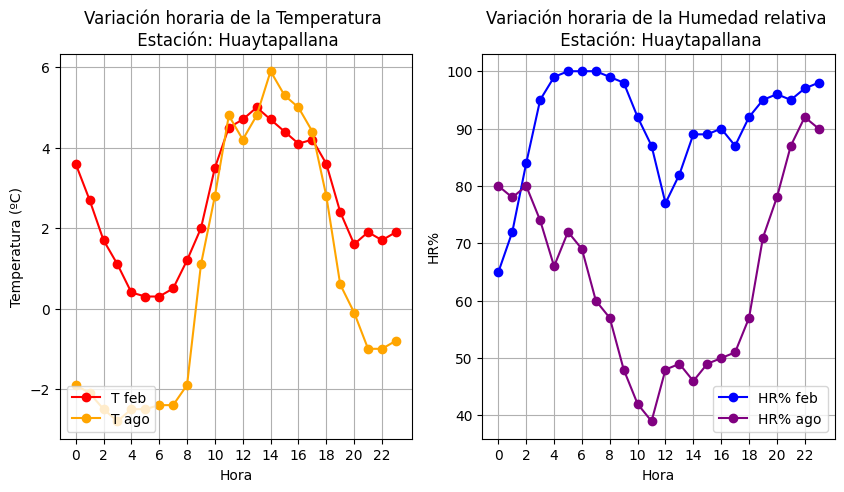

<Figure size 640x480 with 0 Axes>

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para temperaturas
ax1.plot(x,df_Huaytapallana_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax1.plot(x,df_Huaytapallana_ago["TEMPERATURA (°C)"],color="orange", marker="o",label="T ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Temperatura (ºC)")
ax1.set_title("Variación horaria de la Temperatura \n Estación: Huaytapallana")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend(loc="lower left")

#humedad relativa
ax2=axs[1]
ax2.plot(x, df_Huaytapallana_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb ")
ax2.plot(x, df_Huaytapallana_ago["HUMEDAD (%)"],color="purple",marker="o",label="HR% ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("HR%")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend(loc="lower right")
ax2.set_title("Variación horaria de la Humedad relativa \n Estación: Huaytapallana")
ax2.grid()
plt.show()
plt.tight_layout()

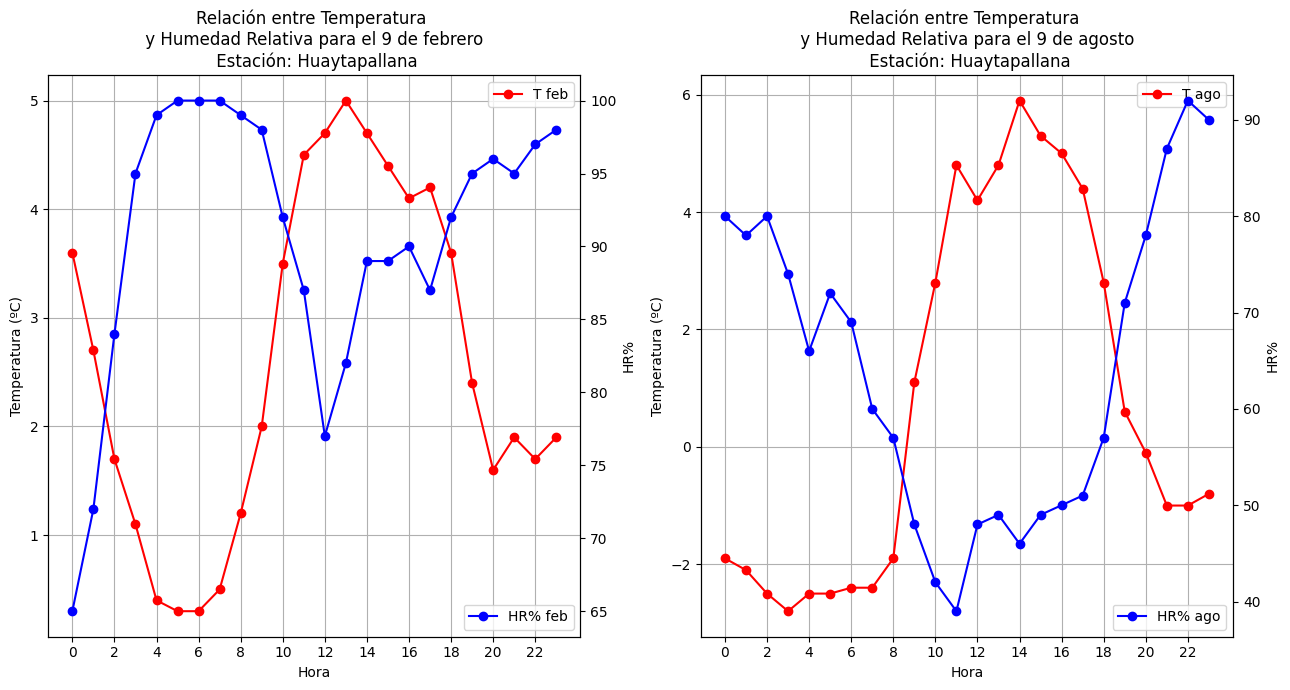

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
x = np.arange(0,24,1)

#FEBRERO
ax=axs[0]
ax.plot(x,df_Huaytapallana_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax.set_xlabel("Hora")
ax.set_ylabel("Temperatura (ºC)")
ax.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de febrero \n Estación: Huaytapallana")
ax.legend(loc="upper right")
ax.grid()
#humedad relativa
ax1=ax.twinx()
ax1.plot(x, df_Huaytapallana_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb")
ax1.set_ylabel("HR%")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.legend(loc="lower right")

#AGOSTO
ax2=axs[1]
ax2.plot(x,df_Huaytapallana_ago["TEMPERATURA (°C)"],color="red", marker="o",label="T ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Temperatura (ºC)")
ax2.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de agosto \n Estación: Huaytapallana")
ax2.legend(loc="upper right")
ax2.grid()

ax3=ax2.twinx()
ax3.plot(x, df_Huaytapallana_ago["HUMEDAD (%)"],color="blue",marker="o",label="HR% ago")
ax3.set_ylabel("HR%")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend(loc="lower right")

plt.tight_layout()

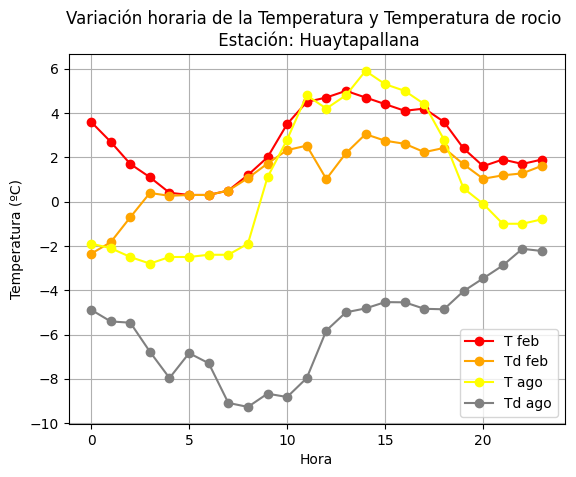

In [20]:
x = np.arange(0,24,1)
plt.plot(x,df_Huaytapallana_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
plt.plot(x,df_Huaytapallana_feb["Td"],color="orange", marker="o",label="Td feb")
plt.plot(x,df_Huaytapallana_ago["TEMPERATURA (°C)"],color="yellow", marker="o",label="T ago")
plt.plot(x,df_Huaytapallana_ago["Td"],color="gray", marker="o",label="Td ago")
plt.title("Variación horaria de la Temperatura y Temperatura de rocio \n Estación: Huaytapallana")
plt.legend()
plt.xlabel("Hora")
plt.ylabel("Temperatura (ºC)")
plt.grid()
plt.show()

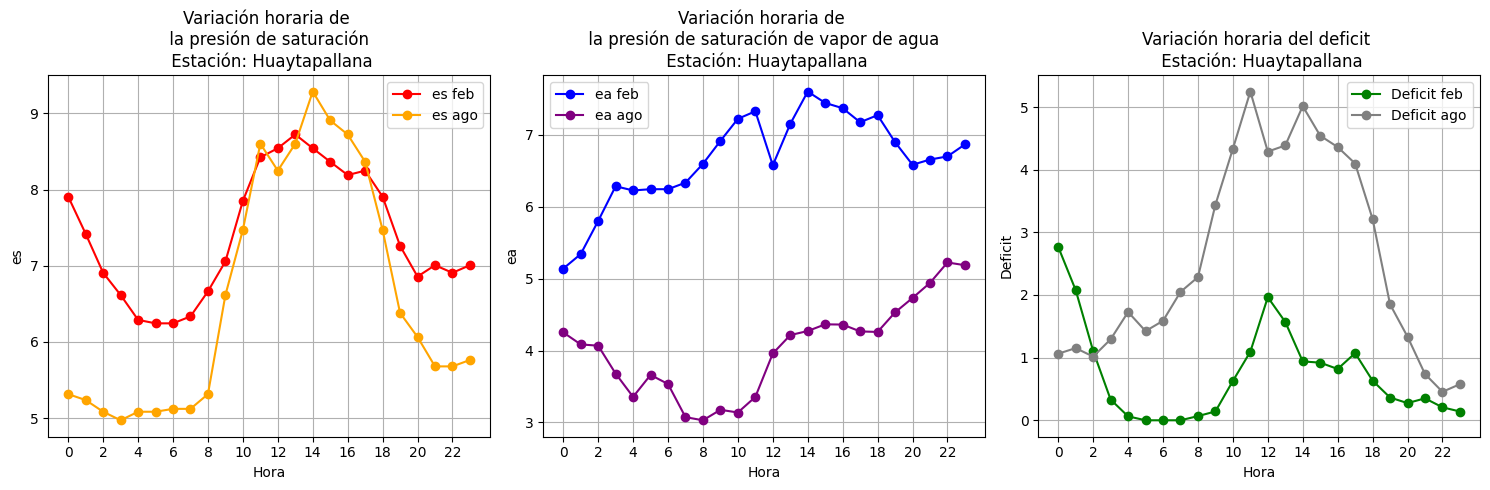

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Huaytapallana_feb["es"],color="red", marker="o",label="es feb")
ax1.plot(x,df_Huaytapallana_ago["es"],color="orange", marker="o",label="es ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("es")
ax1.set_title("Variación horaria de \n la presión de saturación \n Estación: Huaytapallana")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Huaytapallana_feb["ea"],color="blue",marker="o",label="ea feb ")
ax2.plot(x, df_Huaytapallana_ago["ea"],color="purple",marker="o",label="ea ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("ea")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la presión de saturación de vapor de agua \n Estación: Huaytapallana")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Huaytapallana_feb["Deficit"],color="green",marker="o",label="Deficit feb ")
ax3.plot(x, df_Huaytapallana_ago["Deficit"],color="gray",marker="o",label="Deficit ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Deficit")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria del deficit \n Estación: Huaytapallana")
ax3.grid()

plt.tight_layout()

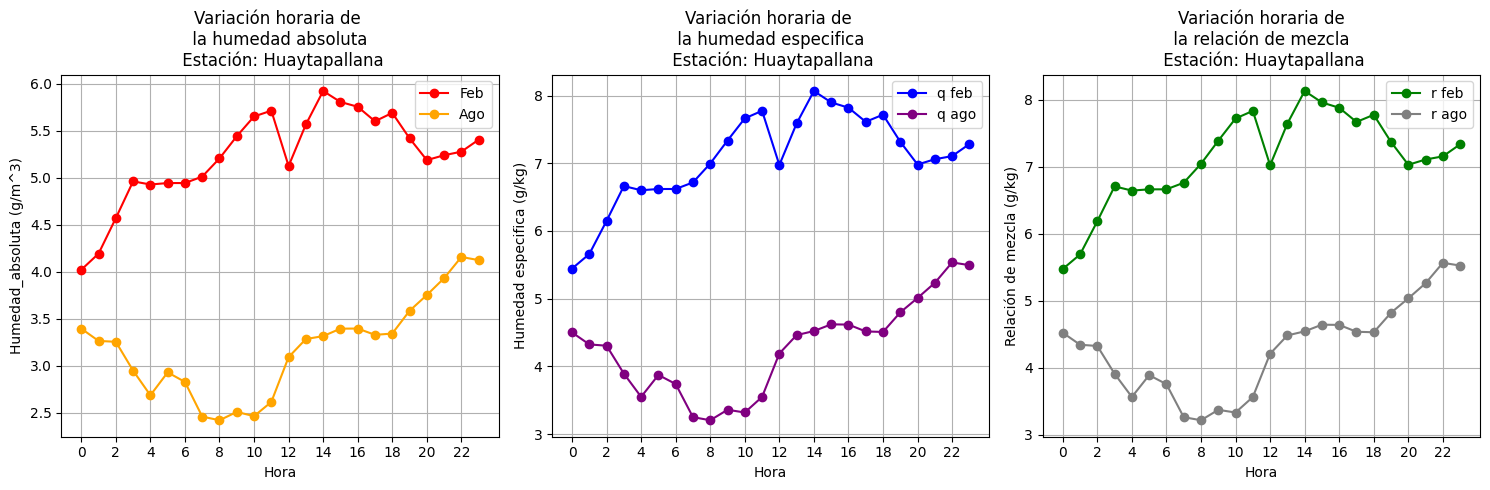

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Huaytapallana_feb["Humedad_absoluta"],color="red", marker="o",label="Feb")
ax1.plot(x,df_Huaytapallana_ago["Humedad_absoluta"],color="orange", marker="o",label="Ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Humedad_absoluta (g/m^3)")
ax1.set_title("Variación horaria de \n la humedad absoluta \n Estación: Huaytapallana")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Huaytapallana_feb["q"],color="blue",marker="o",label="q feb ")
ax2.plot(x, df_Huaytapallana_ago["q"],color="purple",marker="o",label="q ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Humedad especifica (g/kg)")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la humedad especifica \n Estación: Huaytapallana")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Huaytapallana_feb["r"],color="green",marker="o",label="r feb ")
ax3.plot(x, df_Huaytapallana_ago["r"],color="gray",marker="o",label="r ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Relación de mezcla (g/kg)")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria de\n la relación de mezcla \n Estación: Huaytapallana")
ax3.grid()

plt.tight_layout()

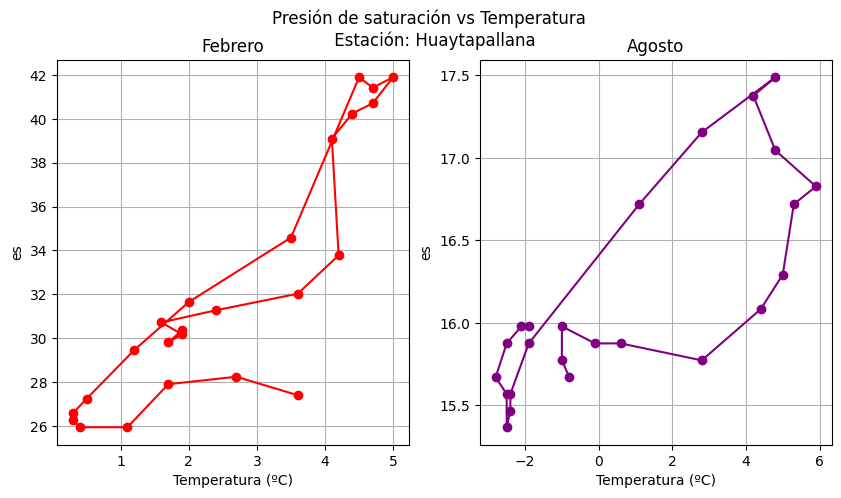

<Figure size 640x480 with 0 Axes>

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para febrero
ax1.plot(df_Huaytapallana_feb["TEMPERATURA (°C)"],df_Von_Humboldt_feb["es"],color="red", marker="o")
ax1.set_xlabel("Temperatura (ºC)")
ax1.set_ylabel("es")
ax1.grid()
ax1.set_title("Febrero")

#Agosto
ax2=axs[1]
ax2.plot(df_Huaytapallana_ago["TEMPERATURA (°C)"],df_Von_Humboldt_ago["es"],color="purple",marker="o")
ax2.set_xlabel("Temperatura (ºC)")
ax2.set_ylabel("es")
ax2.set_title("Agosto")
ax2.grid()
plt.suptitle("Presión de saturación vs Temperatura \n Estación: Huaytapallana")
plt.show()
plt.tight_layout()

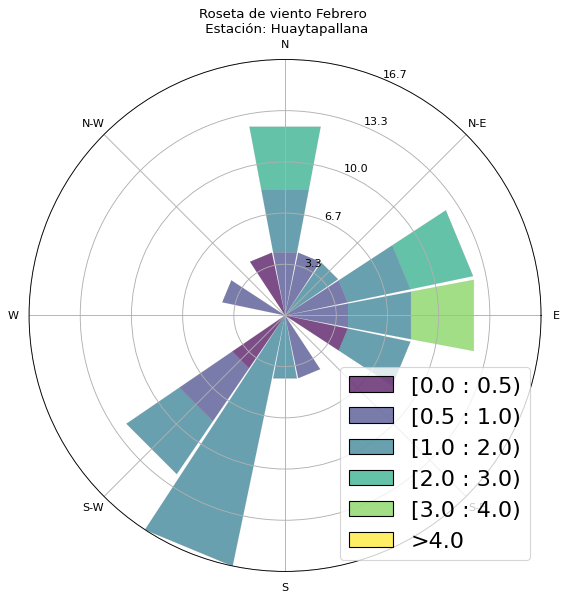

In [24]:
wd_Huaytapallana_feb = df_Huaytapallana_feb['DIRECCION DEL VIENTO (°)']
ws_Huaytapallana_feb= df_Huaytapallana_feb['VELOCIDAD DEL VIENTO (m/s)']


ax = WindroseAxes.from_ax()
ax.bar(wd_Huaytapallana_feb, ws_Huaytapallana_feb, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Febrero \n Estación: Huaytapallana")
plt.legend(fontsize=20, loc='lower right')

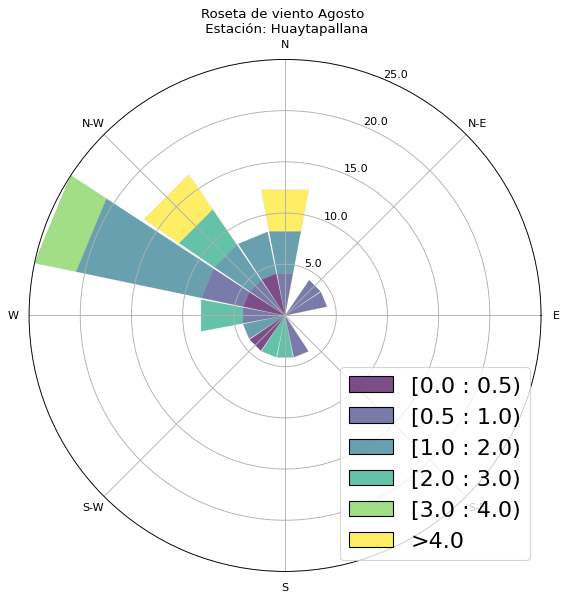

In [25]:
wd_Huaytapallana_ago = df_Huaytapallana_ago['DIRECCION DEL VIENTO (°)']
ws_Huaytapallana_ago= df_Huaytapallana_ago['VELOCIDAD DEL VIENTO (m/s)']


ax = WindroseAxes.from_ax()
ax.bar(wd_Huaytapallana_ago, ws_Huaytapallana_ago, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Agosto \n Estación: Huaytapallana")
plt.legend(fontsize=20, loc='lower right')

## Para Mallinowsky

Pequeña advertencia: Recien me di cuenta de que en Malinowsky para el 9 de agosto no habia datos, asi que puse un archivo de julio, pero debi cambiar el nombre. Revisar bien que dias hay datos para sus estaciones. Igual el codigo ta bien.

In [35]:
df_Malinowsky_ago.head()

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s),dia,es,ea,Deficit,Td,Humedad_absoluta,q,r
59,2019-07-09,00:00,18.8,0.0,98.0,357.0,0.0,9,21.685916,21.252198,0.433718,18.476839,15.759893,13.475353,13.659239
60,2019-07-09,01:00,18.5,0.0,98.0,1.0,0.0,9,21.283027,20.857367,0.425661,18.177595,15.483010,13.222988,13.400005
61,2019-07-09,02:00,18.2,0.0,98.0,335.0,0.0,9,20.886704,20.468970,0.417734,17.878350,15.210338,12.974811,13.145203
62,2019-07-09,03:00,17.9,0.0,98.0,335.0,0.0,9,20.496856,20.086919,0.409937,17.579104,14.941824,12.730761,12.894763
63,2019-07-09,04:00,17.8,0.0,98.0,343.0,0.0,9,20.368330,19.960964,0.407367,17.479355,14.853235,12.650318,12.812240


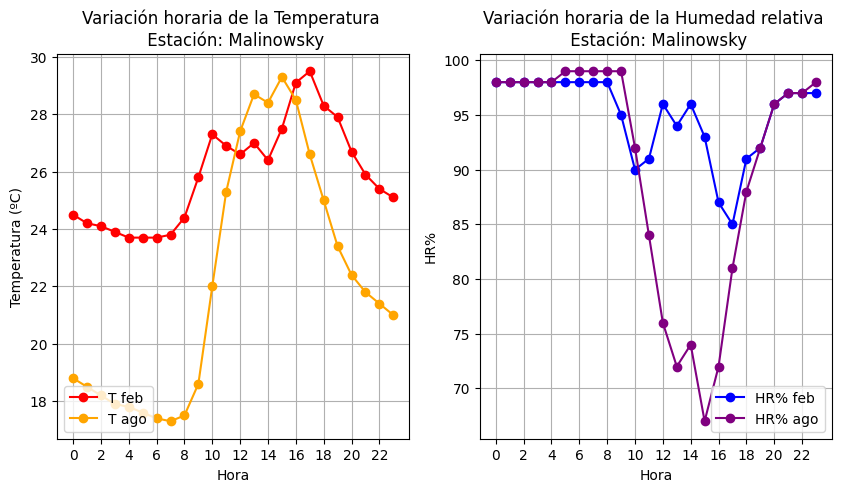

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para temperaturas
ax1.plot(x,df_Malinowsky_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax1.plot(x,df_Malinowsky_ago["TEMPERATURA (°C)"],color="orange", marker="o",label="T ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Temperatura (ºC)")
ax1.set_title("Variación horaria de la Temperatura \n Estación: Malinowsky")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend(loc="lower left")

#humedad relativa
ax2=axs[1]
ax2.plot(x, df_Malinowsky_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb ")
ax2.plot(x, df_Malinowsky_ago["HUMEDAD (%)"],color="purple",marker="o",label="HR% ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("HR%")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend(loc="lower right")
ax2.set_title("Variación horaria de la Humedad relativa \n Estación: Malinowsky")
ax2.grid()
plt.show()

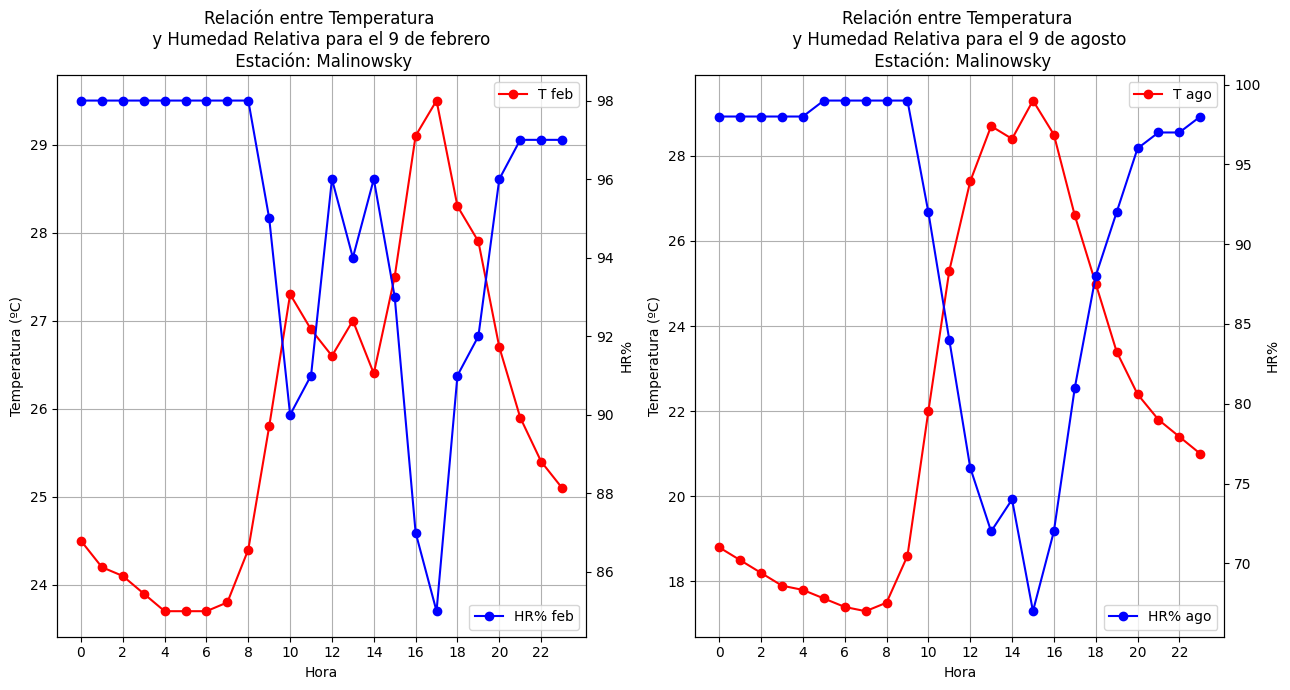

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(13, 7))
x = np.arange(0,24,1)

#FEBRERO
ax=axs[0]
ax.plot(x,df_Malinowsky_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
ax.set_xlabel("Hora")
ax.set_ylabel("Temperatura (ºC)")
ax.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de febrero \n Estación: Malinowsky")
ax.legend(loc="upper right")
ax.grid()
#humedad relativa
ax1=ax.twinx()
ax1.plot(x, df_Malinowsky_feb["HUMEDAD (%)"],color="blue",marker="o",label="HR% feb")
ax1.set_ylabel("HR%")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.legend(loc="lower right")

#AGOSTO
ax2=axs[1]
ax2.plot(x,df_Malinowsky_ago["TEMPERATURA (°C)"],color="red", marker="o",label="T ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Temperatura (ºC)")
ax2.set_title("Relación entre Temperatura \n y Humedad Relativa para el 9 de agosto \n Estación: Malinowsky")
ax2.legend(loc="upper right")
ax2.grid()

ax3=ax2.twinx()
ax3.plot(x, df_Malinowsky_ago["HUMEDAD (%)"],color="blue",marker="o",label="HR% ago")
ax3.set_ylabel("HR%")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend(loc="lower right")

plt.tight_layout()

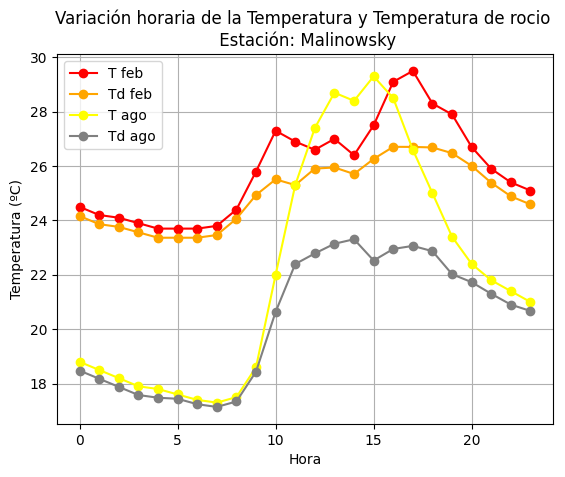

In [29]:
x = np.arange(0,24,1)
plt.plot(x,df_Malinowsky_feb["TEMPERATURA (°C)"],color="red", marker="o",label="T feb")
plt.plot(x,df_Malinowsky_feb["Td"],color="orange", marker="o",label="Td feb")
plt.plot(x,df_Malinowsky_ago["TEMPERATURA (°C)"],color="yellow", marker="o",label="T ago")
plt.plot(x,df_Malinowsky_ago["Td"],color="gray", marker="o",label="Td ago")
plt.title("Variación horaria de la Temperatura y Temperatura de rocio \n Estación: Malinowsky")
plt.legend()
plt.xlabel("Hora")
plt.ylabel("Temperatura (ºC)")
plt.grid()
plt.show()

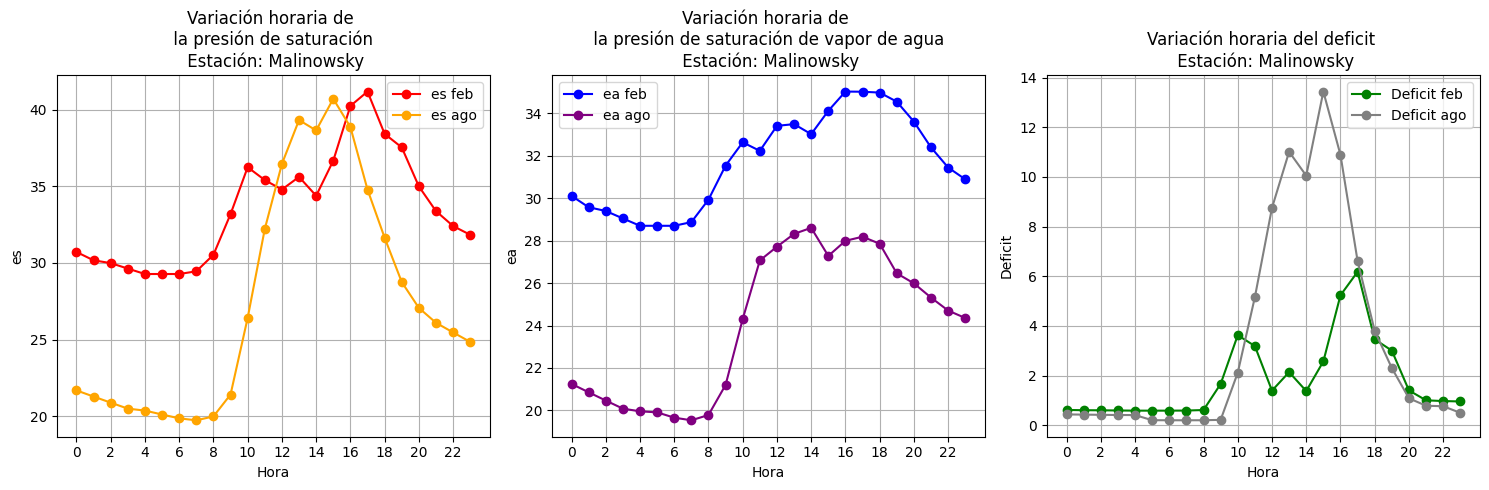

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Malinowsky_feb["es"],color="red", marker="o",label="es feb")
ax1.plot(x,df_Malinowsky_ago["es"],color="orange", marker="o",label="es ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("es")
ax1.set_title("Variación horaria de \n la presión de saturación \n Estación: Malinowsky")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Malinowsky_feb["ea"],color="blue",marker="o",label="ea feb ")
ax2.plot(x, df_Malinowsky_ago["ea"],color="purple",marker="o",label="ea ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("ea")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la presión de saturación de vapor de agua \n Estación: Malinowsky")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Malinowsky_feb["Deficit"],color="green",marker="o",label="Deficit feb ")
ax3.plot(x, df_Malinowsky_ago["Deficit"],color="gray",marker="o",label="Deficit ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Deficit")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria del deficit \n Estación: Malinowsky")
ax3.grid()

plt.tight_layout()

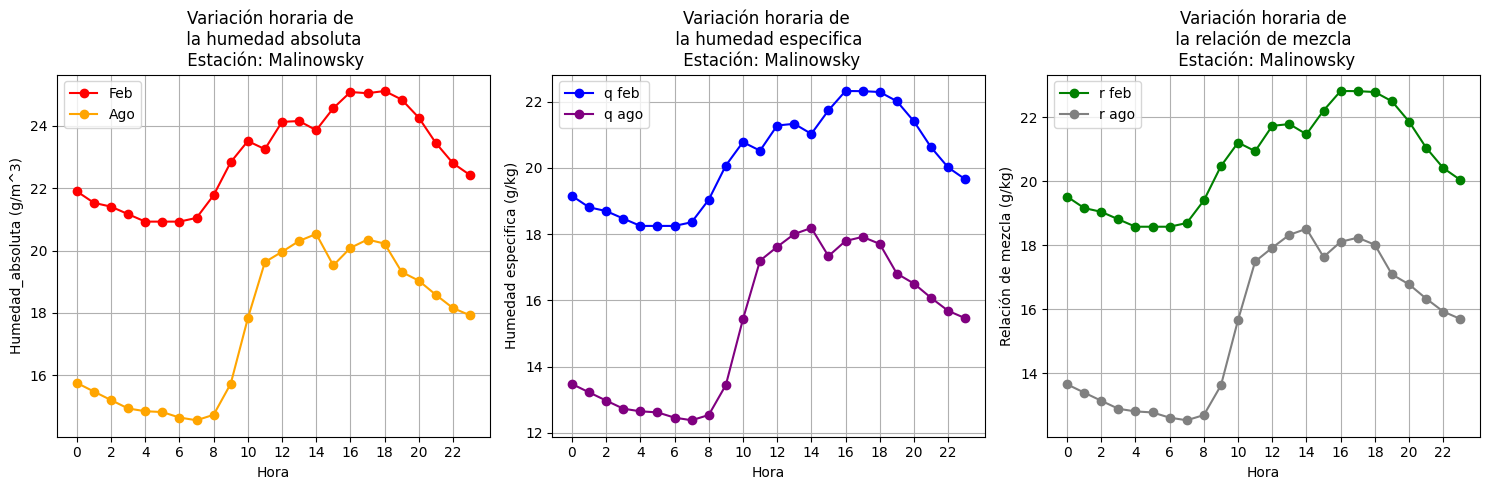

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para es
ax1.plot(x,df_Malinowsky_feb["Humedad_absoluta"],color="red", marker="o",label="Feb")
ax1.plot(x,df_Malinowsky_ago["Humedad_absoluta"],color="orange", marker="o",label="Ago")
ax1.set_xlabel("Hora")
ax1.set_ylabel("Humedad_absoluta (g/m^3)")
ax1.set_title("Variación horaria de \n la humedad absoluta \n Estación: Malinowsky")
ax1.set_xticks(np.arange(0, 24, 2))
ax1.grid()
ax1.legend()
#ea
ax2=axs[1]
ax2.plot(x, df_Malinowsky_feb["q"],color="blue",marker="o",label="q feb ")
ax2.plot(x, df_Malinowsky_ago["q"],color="purple",marker="o",label="q ago")
ax2.set_xlabel("Hora")
ax2.set_ylabel("Humedad especifica (g/kg)")
ax2.set_xticks(np.arange(0, 24, 2))
ax2.legend()
ax2.set_title("Variación horaria de \n la humedad especifica \n Estación: Malinowsky")
ax2.grid()

#deficit
ax3=axs[2]
ax3.plot(x, df_Malinowsky_feb["r"],color="green",marker="o",label="r feb ")
ax3.plot(x, df_Malinowsky_ago["r"],color="gray",marker="o",label="r ago")
ax3.set_xlabel("Hora")
ax3.set_ylabel("Relación de mezcla (g/kg)")
ax3.set_xticks(np.arange(0, 24, 2))
ax3.legend()
ax3.set_title("Variación horaria de\n la relación de mezcla \n Estación: Malinowsky")
ax3.grid()

plt.tight_layout()

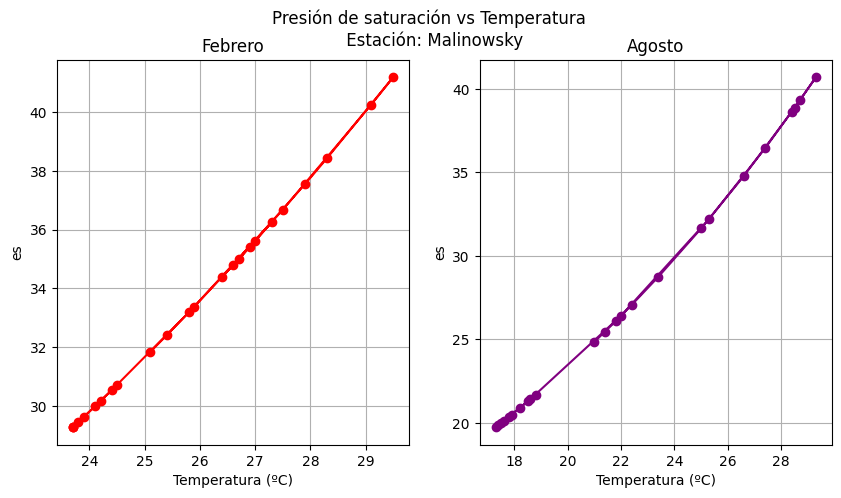

<Figure size 640x480 with 0 Axes>

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1=axs[0]
x = np.arange(0,24,1)
#para febrero
ax1.plot(df_Malinowsky_feb["TEMPERATURA (°C)"],df_Malinowsky_feb["es"],color="red", marker="o")
ax1.set_xlabel("Temperatura (ºC)")
ax1.set_ylabel("es")
ax1.grid()
ax1.set_title("Febrero")

#Agosto
ax2=axs[1]
ax2.plot(df_Malinowsky_ago["TEMPERATURA (°C)"],df_Malinowsky_ago["es"],color="purple",marker="o")
ax2.set_xlabel("Temperatura (ºC)")
ax2.set_ylabel("es")
ax2.set_title("Agosto")
ax2.grid()
plt.suptitle("Presión de saturación vs Temperatura \n Estación: Malinowsky")
plt.show()
plt.tight_layout()

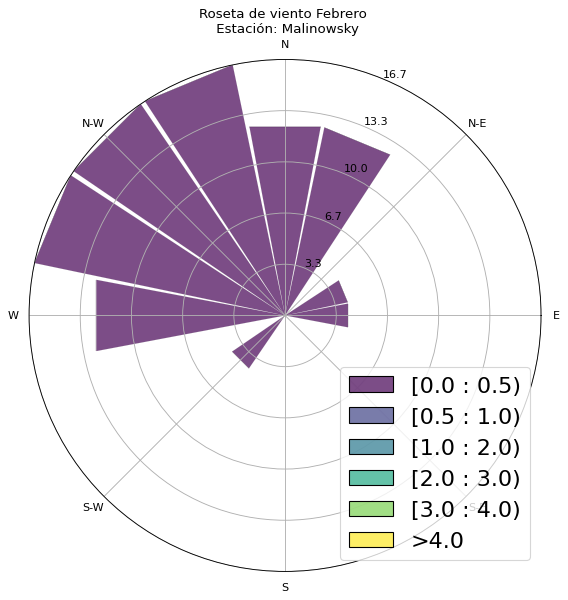

In [33]:
wd_Malinowsky_feb = df_Malinowsky_feb['DIRECCION DEL VIENTO (°)']
ws_Malinowskyt_feb= df_Malinowsky_feb['VELOCIDAD DEL VIENTO (m/s)']

ax = WindroseAxes.from_ax()
ax.bar(wd_Malinowsky_feb, ws_Malinowskyt_feb, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Febrero \n Estación: Malinowsky")
plt.legend(fontsize=20, loc='lower right')

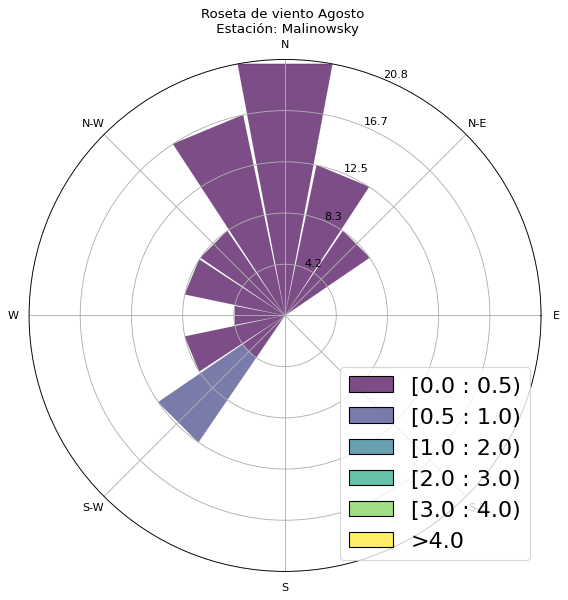

In [34]:
wd_Malinowsky_ago = df_Malinowsky_ago['DIRECCION DEL VIENTO (°)']
ws_Malinowsky_ago= df_Malinowsky_ago['VELOCIDAD DEL VIENTO (m/s)']

ax = WindroseAxes.from_ax()
ax.bar(wd_Malinowsky_ago, ws_Malinowsky_ago, normed=True, opening=0.95, alpha=0.7, edgecolor='gray', lw=0.1, bins=np.array([0,0.5,1,2,3,4])) #, bins=np.arange(0, 31, 5), nsector= 36
#ax.set_legend(fontsize=24, loc='lower right')
plt.title("Roseta de viento Agosto \n Estación: Malinowsky")
plt.legend(fontsize=20, loc='lower right')

# Exportar

In [36]:
columnas_presentables =  ['HORA','TEMPERATURA (°C)','Td','HUMEDAD (%)','es',
                          'ea', 'Deficit','Humedad_absoluta', 'q', 'r']

In [37]:
exportar_Von_Humboldt_feb = df_Von_Humboldt_feb[columnas_presentables]
exportar_Von_Humboldt_feb.to_csv("Exportar/Von_Humboldt_9feb.csv")

In [38]:
exportar_Von_Humboldt_ago = df_Von_Humboldt_ago[columnas_presentables]
exportar_Von_Humboldt_ago.to_csv("Exportar/Von_Humboldt_9ago.csv")

In [39]:
exportar_Huaytapallana_feb = df_Huaytapallana_feb[columnas_presentables]
exportar_Huaytapallana_feb.to_csv("Exportar/Huaytapallana_9feb.csv")

In [41]:
exportar_Huaytapallana_ago = df_Huaytapallana_ago[columnas_presentables]
exportar_Huaytapallana_ago.to_csv("Exportar/Huaytapallana_9ago.csv")

In [42]:
exportarMalinowsky_feb = df_Malinowsky_feb[columnas_presentables]
exportarMalinowsky_feb.to_csv("Exportar/Malinowsky_9feb.csv")

In [43]:
exportarMalinowsky_ago = df_Malinowsky_ago[columnas_presentables]
exportarMalinowsky_ago.to_csv("Exportar/Malinowsky_9ago.csv")